In [12]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999

In [2]:
casos = pd.read_csv('../data/processed/casos_covid.csv')
casos['fecha'] = pd.to_datetime(casos['fecha'], format='%Y-%m-%d')
casos['anio_mes'] = casos['fecha'].dt.year.astype(str) + '-' + casos['fecha'].dt.month.astype(str).str.zfill(2)
display(casos.head(3))

,pais,estado,fecha,confirmados,negativos,casos,defunciones,ola,anio_mes
0,MEXICO,AGUASCALIENTES,2019-12-31,0.0,0,0.0,0.0,ola_1,2019-12
1,MEXICO,AGUASCALIENTES,2020-01-01,0.0,0,0.0,0.0,ola_1,2020-01
2,MEXICO,AGUASCALIENTES,2020-01-02,0.0,2,0.0,0.0,ola_1,2020-01


In [3]:
casos_tot = casos.groupby(by=['pais', 'ola', 'fecha'], as_index=False).agg({'confirmados': 'sum',
                                                                     'negativos': 'sum',
                                                                     'casos': 'sum',
                                                                     'defunciones': 'sum'})
display(casos_tot.head(3))

,pais,ola,fecha,confirmados,negativos,casos,defunciones
0,MEXICO,ola_1,2019-12-31,0.0,0,0.0,0.0
1,MEXICO,ola_1,2020-01-01,0.0,25,0.0,0.0
2,MEXICO,ola_1,2020-01-02,0.0,72,0.0,0.0


In [4]:
casos_ent = casos.groupby(by=['estado'], as_index=False).agg({'confirmados': 'sum',
                                                              'negativos': 'sum',
                                                              'casos': 'sum',
                                                              'defunciones': 'sum'})
display(casos_ent.head(3))

,estado,confirmados,negativos,casos,defunciones
0,AGUASCALIENTES,52203.0,103090,55464.0,3261.0
1,BAJA CALIFORNIA,123336.0,157765,134976.0,11640.0
2,BAJA CALIFORNIA SUR,94531.0,150378,97065.0,2534.0


In [5]:
casos_mes = casos.groupby(by=['estado', 'anio_mes'], as_index=False).agg({'confirmados': 'sum',
                                                              'negativos': 'sum',
                                                              'casos': 'sum',
                                                              'defunciones': 'sum'})
display(casos_mes.head(3))

,estado,anio_mes,confirmados,negativos,casos,defunciones
0,AGUASCALIENTES,2019-12,0.0,0,0.0,0.0
1,AGUASCALIENTES,2020-01,0.0,171,0.0,0.0
2,AGUASCALIENTES,2020-02,0.0,173,0.0,0.0


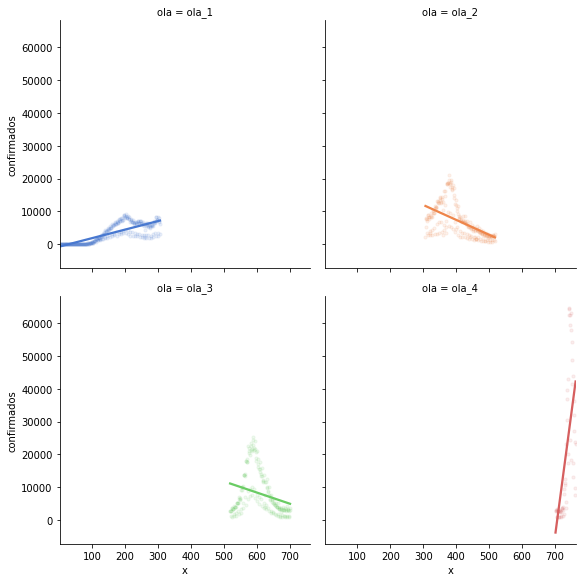

In [11]:
subset = casos_tot.copy()
subset['x'] = subset.index + 1
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="confirmados", col="ola", hue="ola", data=subset,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 10, "alpha": 0.1})

<AxesSubplot:xlabel='confirmados', ylabel='negativos'>

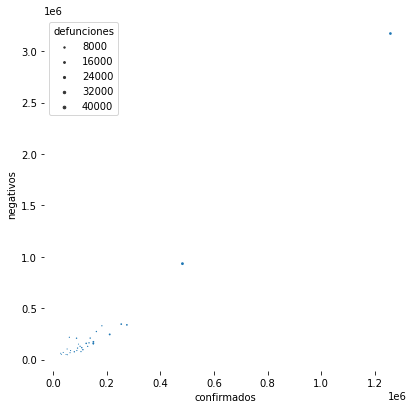

In [16]:
subset = casos_ent.copy()

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="confirmados", y="negativos",
                size="defunciones",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=subset, ax=ax)

,pais,ola,fecha,confirmados,negativos,casos,defunciones
0,MEXICO,ola_1,2019-12-31,0.0,0,0.0,0.0
1,MEXICO,ola_1,2020-01-01,0.0,25,0.0,0.0
2,MEXICO,ola_1,2020-01-02,0.0,72,0.0,0.0


<AxesSubplot:xlabel='fecha', ylabel='confirmados'>

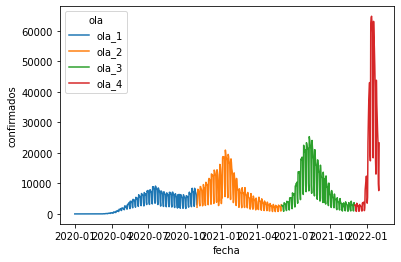

In [19]:
subset = casos_tot.copy()
display(subset.head(3))

sns.lineplot(x="fecha", y="confirmados",
             hue="ola", 
             data=subset)

,fecha,ola,concepto,conteo
0,2019-12-31,ola_1,confirmados,0.0
1,2020-01-01,ola_1,confirmados,0.0
2,2020-01-02,ola_1,confirmados,0.0


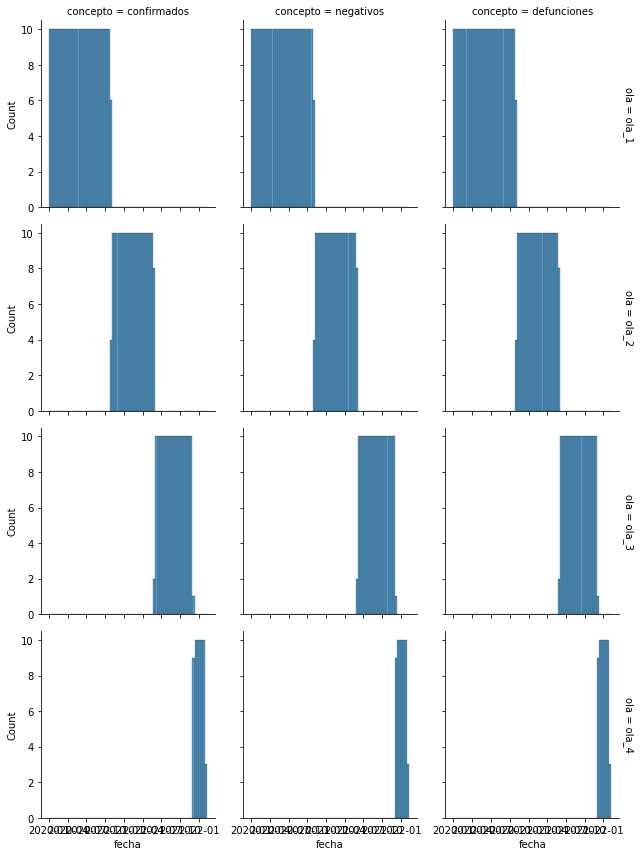

In [24]:
subset = casos_tot.copy()
subset = pd.melt(subset, id_vars=['fecha', 'ola'], value_vars=['confirmados', 'negativos', 'defunciones'],
                 var_name='concepto', value_name='conteo')

display(subset.head(3))
sns.displot(
    subset, x="fecha", col="concepto", row="ola",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
)

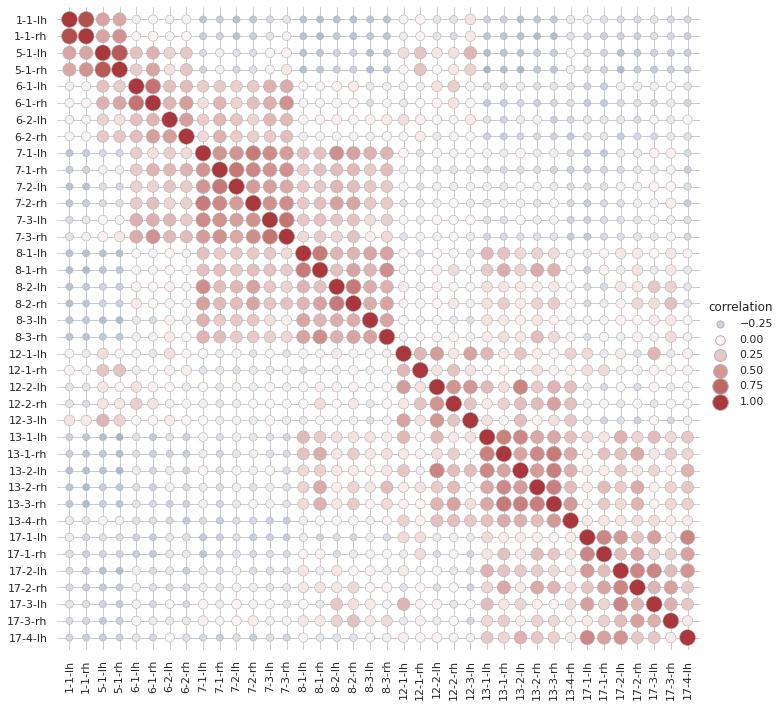

In [25]:
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

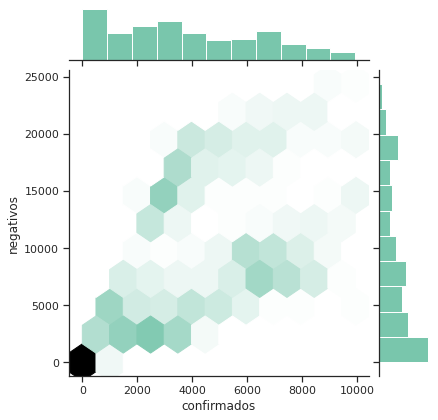

In [30]:
subset = casos_tot.loc[casos_tot['confirmados'] < 10000]
sns.set_theme(style="ticks")

sns.jointplot(x=subset['confirmados'], y=subset['negativos'], kind="hex", color="#4CB391")

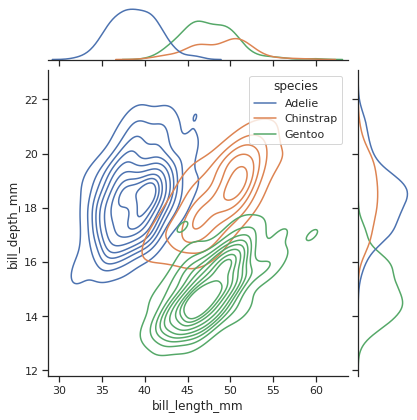

In [31]:
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)


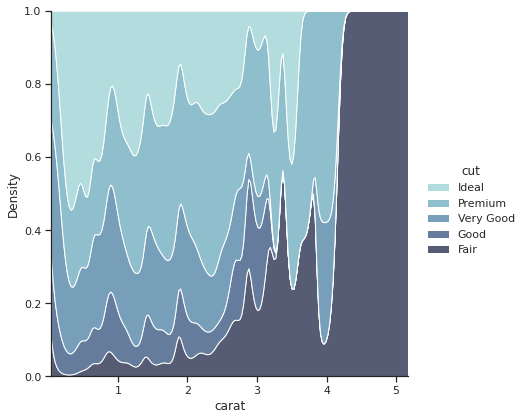

In [32]:
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

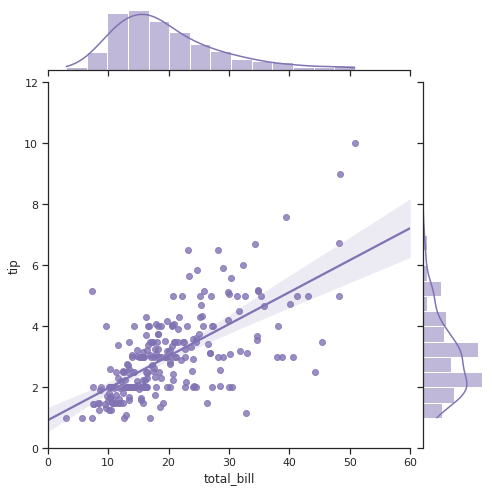

In [34]:
tips = sns.load_dataset("tips")

g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

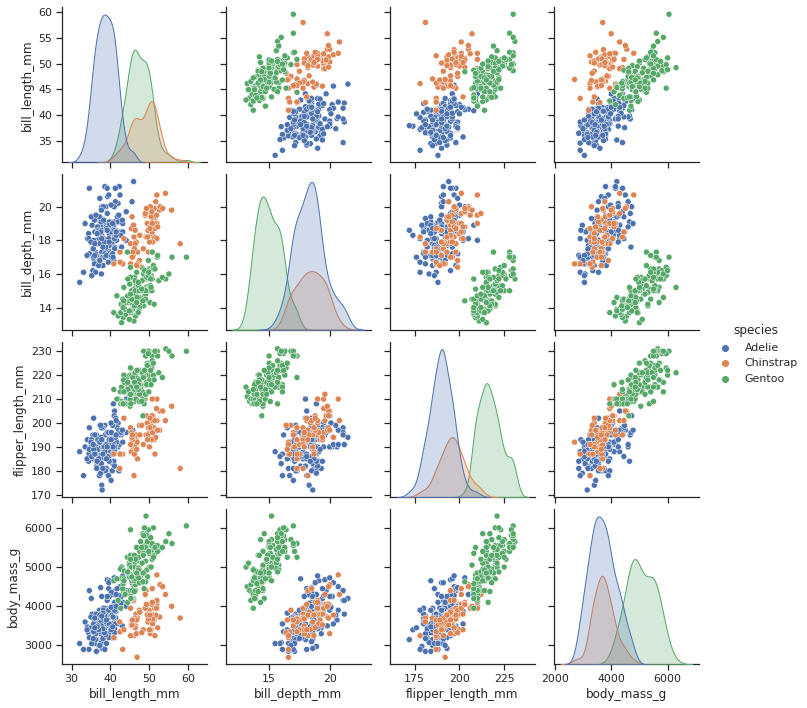

In [35]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

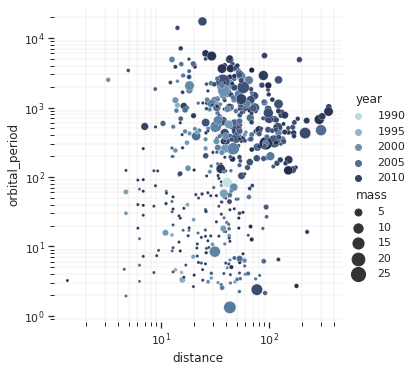

In [36]:
# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)